# Interactive Notebook Tutorial

Welcome to Jupyter Notebook. The most popular IDE for Data Analysis in Python!

### Objective of this tutorial:

> **Help you get started with Jupyter Notebooks for Data Analysis and Python programming.**




## Jupyter Notebooks

This document that you're currently reading is a "Jupyter Notebook", and you've probably heard about it before. It's like a text document, but you can do many things on it:
- run code 
- display inline graphs
- pull data from databases 
- show excel spreadsheets and csv files!

Isn't it amazing? 😄 

**Interesting fact of the day:**

> _Jupyter is a nod to 3 languages: Julia, Python, and R._

This is a really quick tutorial on how to get started with Jupyter notebooks (and lab). It shouldn't take more than 10 minutes and you'll be writing Python code right away.

### Part 1: everything is a _cell_

Jupyter Notebooks are organized as a set of _"cells"_. Each cell can contain different types of content: like Python code (or R, Julia, etc), images or even human readable text (markdown), like the one you're currently reading.

We've left a couple of empty cells below for you to see them:

This is another cell containing Markdown (human readable) code or in simple words, **text**. And below, another empty cell:

You can edit these cells just by double clicking on them. Try editing the following cell:

**👉 Double click on me 👈**

When you double click the cell, it should open an `edit mode`.


If you see asterisks, it's because you've correctly entered "Edit Mode". Once you've made the changes, you have to "execute", or "run" the cell to reflect the changes. To do that just click on the little _play_ button on the top menu bar.

Jupyter notebooks are optimized for an efficient workflow. There are many keyboard shortcuts that will let you interact with your documents, run code and make other changes; mastering these shortcuts will speed up your work. For example, there are two shortcuts to execute a cell:

1. `shift + return`: Run cell and advance to the next one.
2. `ctrl  + return`: Run the cell but don't change focus.


Try them with the following cell:

In [5]:
2 + 2

4

You can try executing these cells as many times as you want, it won't break anything

#### `ctrl + Return` effect:

As you can see when running this, the code is correctly executed (it returns 4) and the focus (the blue line at the left side of the cell) stays in the same cell.


Now compare it to the next shortcut, `shift + return`:

#### `shift + Return` effect:


As you could see, every time we execute code the focus changes to the cell below.

## Part 2: Working with code

Jupyter notebooks have amazing features to include text and images and create beautiful, human readable documents as you've just seen. But their main benefit is working with code. Now we're going to import a few libraries and start experimenting with Python code. We've already done the simple `2 + 2` before, so let's do something a little bit more interesting. First, we need to import `numpy` and `matplotlib`:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Notebooks.ai include all the most popular Data Science and Deep Learning libraries already installed. And even if there's one missing, you can always install it in your own environment (more on that later). We've just imported these two libraries:
* `numpy` the most popular Python library for array manipulation and numeric computing
* `matplotlib` the most popular visualization library in the Python ecosystem.

Let's now execute a few lines of code and generate some plots:

In [7]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

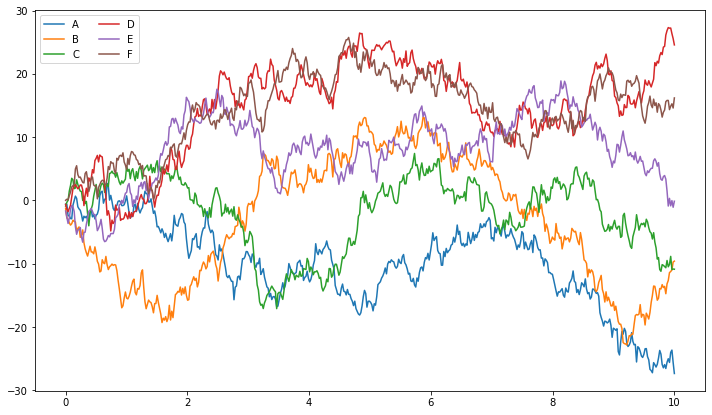

In [8]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

So what is this? Those are just random generated datapoints, but you can clearly see how simple is to do numeric processing and plotting inside Jupyter Notebooks!.


## Part 3: Interacting with data

Jupyter Notebook makes it really simple to interact with data in your local storage.

To show you the full potential of Jupyter Notebook, we're going to pull cryptocurrencies prices from a public API and store them as **csv** files, pretty fancy, right?. It looks quite complicated but **we will be able to do such things on our own at the end of this week!**

We need to import two libraries first: `requests` (to pull data from the web) and `pandas` to process it.

In [9]:
import requests
import pandas as pd

I have a predefined function that simplifies the process of importing data from [Cryptowatch](https://cryptowat.ch) (for reference, check [their docs](https://cryptowat.ch/docs/api#ohlc)).

In [10]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

I will now pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

In [11]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-07-17 09:34:11.557436')

In [29]:
# FROM API USING requests PACKAGE

btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [20]:
# FROM disk USING CSV FILE

btc = pd.read_csv('bitcoin_price.csv', sep = ";")

In [13]:
# FROM API USING requests PACKAGE

eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [25]:
# FROM disk USING CSV FILE

eth = pd.read_csv('eth_price.csv', sep = ";")

**Bitcoin:**

In [21]:
btc.head()

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
0,2023-07-17 10:00:00,30276,30287,30166,30191,54.707079,1.653742e+06
1,2023-07-17 11:00:00,30185,30214,29997,30177,168.491143,5.072471e+06
2,2023-07-17 12:00:00,30172,30268,30160,30175,71.679085,2.165195e+06
3,2023-07-17 13:00:00,30174,30211,30041,30211,128.869503,3.883466e+06
4,2023-07-17 14:00:00,30213,30304,30168,30289,68.739430,2.078169e+06


<AxesSubplot:>

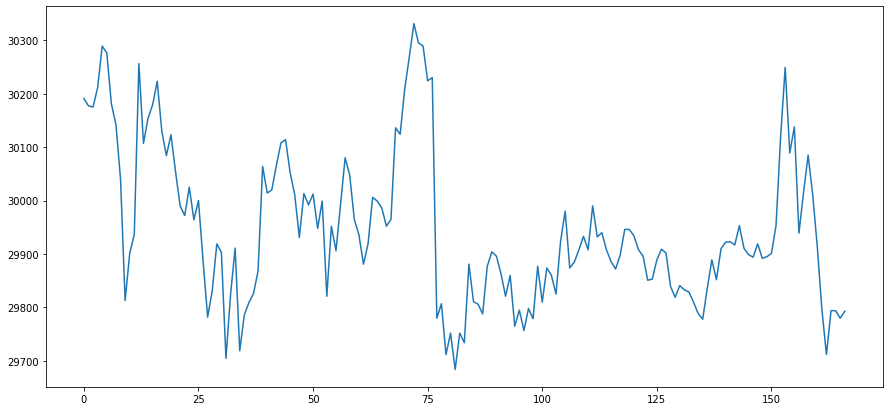

In [22]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether:**

In [23]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-07-17 10:00:00,1925.9,1927.5,1912.7,1914.8,251.097345,4.815508e+05
2023-07-17 11:00:00,1914.1,1916.5,1893.2,1910.4,967.685494,1.848094e+06
2023-07-17 12:00:00,1909.4,1919.5,1909.4,1911.0,356.254920,6.824248e+05
2023-07-17 13:00:00,1910.7,1913.6,1901.6,1911.8,800.362557,1.528609e+06
2023-07-17 14:00:00,1912.0,1917.5,1908.5,1916.7,288.418162,5.513249e+05


<AxesSubplot:>

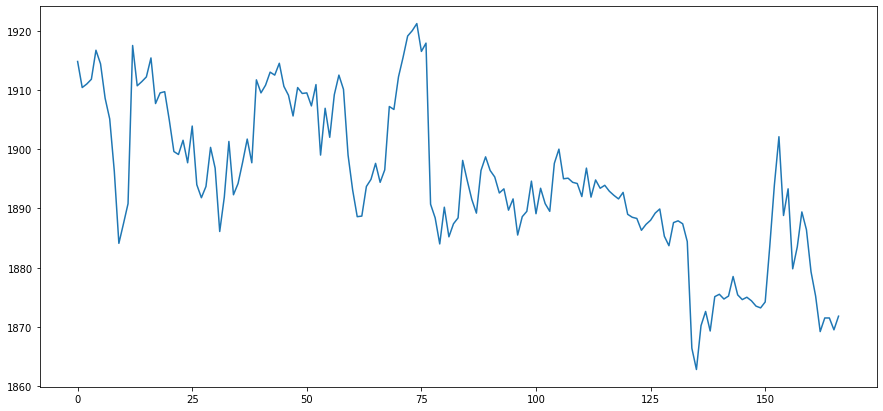

In [26]:
eth['ClosePrice'].plot(figsize=(15, 7))

As you can see, we're able to pull data from the internet with just a few lines, create a DataFrame and plot it all within Jupyter Notebook.

## Part 4: Exporting to CSV

We're now ready to generate an Excel file from the downloaded prices. Working with CSV and other formats (like XML or JSON) is extremely simple in Python and Jupyter Notebook. `Pandas` library has pre-built methods to store data as CSV

We'll now write both our Bitcoin and Ether data to separate files:

In [18]:
btc.to_csv('bitcoin_price.csv', sep = ";")

In [19]:
eth.to_csv('eth_price.csv', sep = ";")

It's your time **now** to start learning and working inside the jupyter notebook.

To become a more proficient user, read and learn [Some neat Jupyter tricks](https://medium.com/swlh/some-neat-jupyter-tricks-be0775c3f17).

# Variables

In [ ]:
# assign an integer variable 
temperature = 32

In [ ]:
# print variable value
print(temperature)

In [ ]:
# print variable value
temperature

In [ ]:
# check the type of variable
type(temperature)

In [ ]:
# assign a float variable
temperature = 32.5

In [ ]:
# check the type of variable
type(temperature)

In [ ]:
# assign a string variable
country_code = 'SK'
country_code

In [ ]:
# overwrite value of variable
country_code = "DE"
country_code

In [ ]:
# check the type of variable
type(country_code)

In [ ]:
# assign a boolean variable
is_done = True
is_done

In [ ]:
# check the type of variable
type(is_done)

# Strings

## What are strings in Python?
- Sequence of characters. 
- Are immutable. This means that once defined, they cannot be changed.
- Defined by single quotes or double quoutes

In [ ]:
# assign a string variable
name = 'Jakub'
surname = 'String'

In [ ]:
# concatination
name_surname = name + ' '  + surname
name_surname

In [ ]:
# multiplication
name * 5

In [ ]:
# check if string contains another string
'John' in name_surname

In [ ]:
# check if string contains another string (case sensitive)
'john' in name_surname

In [ ]:
# print length of string
len(name)

In [ ]:
# convert to string
temperature = 32.5
print(type(temperature))
print(type(str(temperature)))

In [ ]:
# can not concatenate numeric data types with strings without conversion
2 + 'string'

In [ ]:
# appropriate way of concatination
str(2) + 'string'

In [ ]:
# print variable
name

In [ ]:
# slicing
name[0:2]

In [ ]:
# slicing
name[:2]

In [ ]:
# slicing
name[0:-1]

In [ ]:
# slicing
name[2:2]

In [ ]:
# slicing
name[1:2]

In [ ]:
# slicing
name[-2:]

### String functions

In [ ]:
name.upper()

In [ ]:
name.lower()

In [ ]:
name.find('a')

In [ ]:
name.replace('a',"A")

there is a list of all string functions [here](https://www.w3schools.com/python/python_ref_string.asp).

# Lists

## What are lists in Python?
- Are used to store multiple items in a single variable.
- Are muttable.
- Items are ordered.
- Allow duplicate values.
- Items can be of any data type.


In [ ]:
# create a list
names = [name, 'Peter', 'Jana', 'Hana']
names

In [ ]:
# unpack a list to multiple variables
n1,n2,n3,n4 = names
print(n1,n2,n3,n4)

In [ ]:
# check the type
type(names)

In [ ]:
# print length
len(names)

In [ ]:
# indexing
names[0]

In [ ]:
# indexing
names[1:5]

In [ ]:
# indexing
names[5]

In [ ]:
# create a list
names2 = [name, 'Peter', 'Jana', 'Hana']

In [ ]:
# compare objects
names2 is names

In [ ]:
# compare a values
names2 == names

In [ ]:
# create a nested list
nested_list = ['a', ['b', 'c'], 4]
nested_list

In [ ]:
# check the type of elements
print(type(nested_list[0]))
print(type(nested_list[1]))

In [ ]:
# append to list
# names.append('Petra')
# names = names + ['Petra']
names += ['Petra']
names

In [ ]:
# extend a list
#names.extend(names2)
names += names2
names

In [ ]:
# modification
names[0] = 'Lukas'
names

## Tuples

## What are tuples in Python?
- Are used to store multiple items in a single variable.
- Are immuttable.
- Items are ordered.
- Allow duplicate values.
- Items can be of any data type.


In [ ]:
# create a tuple from list
tpl_names = tuple(names)
tpl_names

In [ ]:
# create a tuple from values
tpl_names2 = ('Jakub', 'Peter', 'Jana', 'Hana')
tpl_names2

In [ ]:
# modification (tuples are IMMUTABLE!)
tpl_names2[0] = 'Lukas'

## Dictionaries

## What are dictionaries in Python?
- Are used to store data values in key-value pairs.
- Are collections which are ordered (from python 3.7 above)
- Are muttable.
- Can not have two items with the same key.
- Keys must be of immutable data-type.
- Items can be of any data type.


In [ ]:
# create a dictionary
dct = {
    'key_1': 'value_1',
    'key_2': 'value_2',
    'key_3': 'value_3'
}

dct

In [ ]:
# print value of 'key_1'
dct['key_1']

In [ ]:
# print value of non-existing key
dct['key_10']

In [ ]:
# default value
dct.get('key_10','NOT FOUND')

In [ ]:
# modification
dct['key_1'] = 'value_1_replaced'
dct['key_1']

In [ ]:
# assign list 
dct['key_4'] = ['a','b','c']

In [ ]:
# print 'key_4' values
dct['key_4']

In [ ]:
# list as a key (mutable data type)
dct[['a','b']] = 3

In [ ]:
# tuple as a key (immutable data type)
dct[('a','b')] = 3

In [ ]:
# print keys
dct.keys()

In [ ]:
# print values
dct.values()

In [ ]:
# print items
dct.items()